In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [2]:
images_dir = r"D:\2022BE Projects\Cardless ATm\Face Image"

In [3]:
batch_size = 32
img_height = 255
img_width = 255

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 237 files belonging to 3 classes.
Using 190 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 237 files belonging to 3 classes.
Using 47 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['dhanush', 'mahesh', 'manjunath']


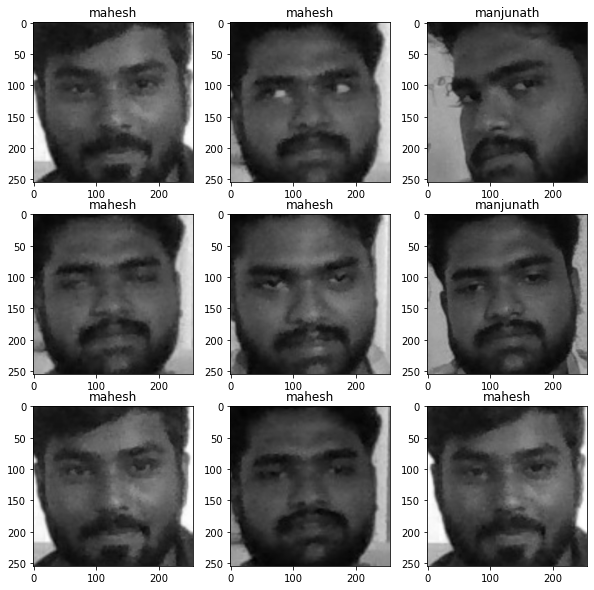

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 255, 255, 3)
(32,)


In [9]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [10]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.034078427 1.0


In [11]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 255, 255, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 255, 255, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        1

In [14]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
6/6 [==============================] - 13s 2s/step - loss: 1.9148 - accuracy: 0.4737 - val_loss: 0.8650 - val_accuracy: 0.6383
Epoch 2/5
6/6 [==============================] - 12s 2s/step - loss: 0.7994 - accuracy: 0.7105 - val_loss: 0.4091 - val_accuracy: 0.9362
Epoch 3/5
6/6 [==============================] - 13s 2s/step - loss: 0.3431 - accuracy: 0.9579 - val_loss: 0.1587 - val_accuracy: 0.9787
Epoch 4/5
6/6 [==============================] - 12s 2s/step - loss: 0.1347 - accuracy: 0.9737 - val_loss: 0.0786 - val_accuracy: 0.9787
Epoch 5/5
6/6 [==============================] - 12s 2s/step - loss: 0.1024 - accuracy: 0.9684 - val_loss: 0.0589 - val_accuracy: 0.9787


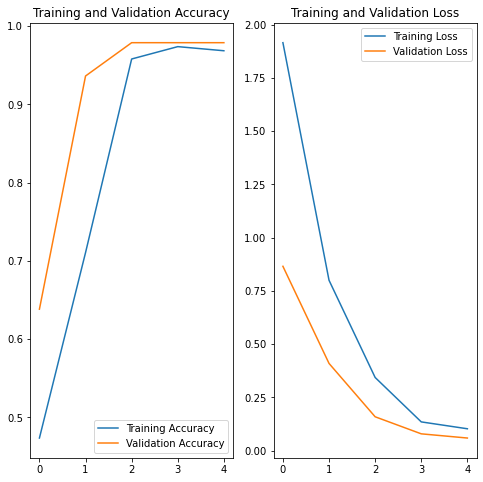

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
model.save("Cardless_face_Model.h5")

In [17]:
test_data = r"D:\2022BE Projects\Cardless ATm\Face Image\dhanush/a.1.44.jpg"
test_data_path = test_data

img = keras.preprocessing.image.load_img(
    test_data_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 344ms/step
This image most likely belongs to dhanush with a 99.85 percent confidence.


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [19]:
images_dir = r"D:\2022BE Projects\Cardless ATm\FingerPrint"

In [20]:
batch_size = 32
img_height = 255
img_width = 255

In [21]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 90 files belonging to 3 classes.
Using 72 files for training.


In [22]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 90 files belonging to 3 classes.
Using 18 files for validation.


In [23]:
class_names = train_ds.class_names
print(class_names)

['dhanush', 'mahesh', 'manjunath']


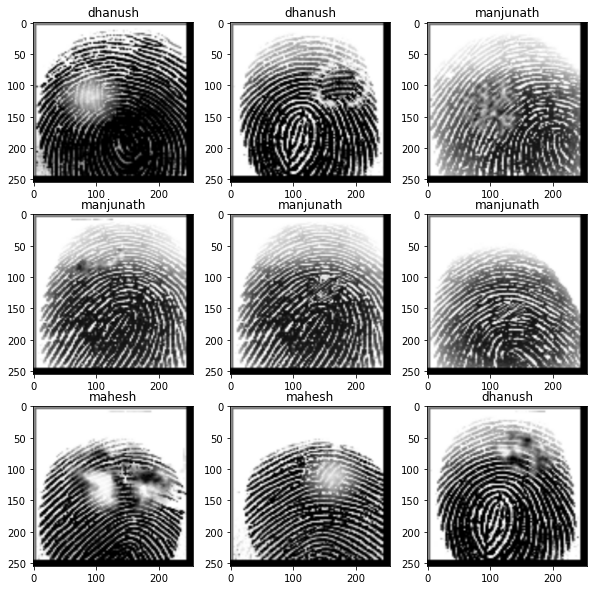

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [25]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 255, 255, 3)
(32,)


In [26]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [27]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 255, 255, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 255, 255, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 127, 127, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 63, 63, 64)       

In [30]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
3/3 [==============================] - 6s 1s/step - loss: 3.1453 - accuracy: 0.3056 - val_loss: 2.2440 - val_accuracy: 0.4444
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 1.6346 - accuracy: 0.4306 - val_loss: 1.2685 - val_accuracy: 0.1667
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 1.0575 - accuracy: 0.3750 - val_loss: 1.0636 - val_accuracy: 0.2222
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.9501 - accuracy: 0.6944 - val_loss: 0.9276 - val_accuracy: 0.7222
Epoch 5/15
3/3 [==============================] - 5s 1s/step - loss: 0.8128 - accuracy: 0.9306 - val_loss: 0.8276 - val_accuracy: 0.6111
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6663 - accuracy: 0.7778 - val_loss: 0.5985 - val_accuracy: 0.7778
Epoch 7/15
3/3 [==============================] - 5s 1s/step - loss: 0.4416 - accuracy: 0.9583 - val_loss: 0.4745 - val_accuracy: 0.9444
Epoch 8/15
3/3 [=========================

In [31]:
model.save("Cardless_finger_Model.h5")